 This dataset contains information of users from a companies database. It contains information about UserID, Gender, Age, EstimatedSalary, Purchased. We are using this dataset for predicting that a user will purchase the company’s newly launched product or not.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
dataset = pd.read_csv("User_Data.csv")
#dataset.shape


In [7]:
dataset.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


Now, to predict whether a user will purchase the product or not, one needs to find out the relationship between Age and Estimated Salary. Here User ID and Gender are not important factors for finding out this.

In [8]:
#Data preprocessing

# input
x = dataset.iloc[:, [2, 3]].values
  
# output
y = dataset.iloc[:, 4].values

# print(x)

In [9]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [10]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [11]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))

Accuracy :  0.68


In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)

Confusion Matrix : 
 [[68  0]
 [32  0]]


## Improving the Models ##

It is clearly visible that the data is not in the same scale. Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.


In [13]:
#Data preprocessing
# input
x = dataset.iloc[:, [2, 3]].values
  
# output
y = dataset.iloc[:, 4].values
#print(x)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#option 1
# scaler.fit(x)
# x = scaler.transform(x) 

#option 2
x = scaler.fit(x).transform(x)

#option 3
#x = scaler.fit_transform(x)

#print(x)

In [14]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [15]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [16]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)
  
print ("Confusion Matrix : \n", cm)
from sklearn import metrics
print(metrics.classification_report(ytest, y_pred))

Accuracy :  0.89
Confusion Matrix : 
 [[65  3]
 [ 8 24]]
              precision    recall  f1-score   support

           0       0.89      0.96      0.92        68
           1       0.89      0.75      0.81        32

    accuracy                           0.89       100
   macro avg       0.89      0.85      0.87       100
weighted avg       0.89      0.89      0.89       100



# Lets try minmax scaler for this problem and see the accuracy. #

In [17]:
#Data preprocessing
# input
x = dataset.iloc[:, [2, 3]].values
  
# output
y = dataset.iloc[:, 4].values


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#option 1
scaler.fit(x)
x = scaler.transform(x) 

#option 2
#x = scaler.fit(x).transform(x)

#option 3
#x = scaler.fit_transform(x)

#print(x)

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [19]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(xtrain, ytrain)
y_pred = classifier.predict(xtest)

In [20]:
from sklearn.metrics import accuracy_score
print ("Accuracy : ", accuracy_score(ytest, y_pred))
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest, y_pred)  
print ("Confusion Matrix : \n", cm)
from sklearn import metrics
print(metrics.classification_report(ytest, y_pred))

Accuracy :  0.89
Confusion Matrix : 
 [[67  1]
 [10 22]]
              precision    recall  f1-score   support

           0       0.87      0.99      0.92        68
           1       0.96      0.69      0.80        32

    accuracy                           0.89       100
   macro avg       0.91      0.84      0.86       100
weighted avg       0.90      0.89      0.88       100



'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


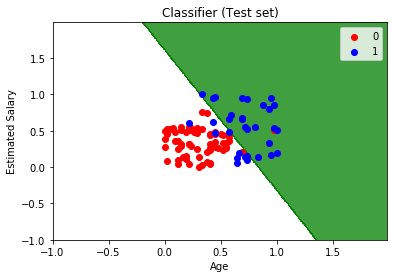

In [21]:
from matplotlib.colors import ListedColormap
X_set, y_set = xtest, ytest
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, 
                               stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, 
                               stop = X_set[:, 1].max() + 1, step = 0.01))
  
plt.contourf(X1, X2, classifier.predict(
             np.array([X1.ravel(), X2.ravel()]).T).reshape(
             X1.shape), alpha = 0.75, cmap = ListedColormap(('white', 'green')))
  
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
  
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'blue'))(i), label = j)
      
plt.title('Classifier (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()